In [6]:
import matplotlib.pyplot as plt
import json
import h5py
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style('white')
# style.use('whitegrid')
sns.set(font_scale=2.0, style="white", rc={"lines.linewidth": 4.0})

## Numbers of Data Augmentations

In [3]:
scale = []
result = []
for i in range(75):
    dir_name = "../results/from_greene/softmax_temp_flips/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # print(res1["data"])
        if res1['data'] == 'cifar10_flips':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale.append(res1["softmax_temp"])
                result.append(res2["result"])
    except:
        print(i, "not found")

0 not found


In [4]:
scale2 = []
result2 = []
for i in range(51):
    dir_name = "../results/from_greene/softmax_temp_crops/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # print(res1["data"])
        if res1['data'] == 'cifar10_crops':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale2.append(res1["softmax_temp"])
                result2.append(res2["result"])
    except:
        print(i, "not found")

0 not found


In [5]:
scale3 = []
result3 = []
for i in range(76):
    dir_name = "../results/from_greene/softmax_temp_scaling/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        if res1['data'] == 'cifar10_augmented':
            # print(res1["softmax_temp"], res2["result"])
            if res2["result"] is not None:
                scale3.append(res1["softmax_temp"])
                result3.append(res2["result"])
            else:
                print(i, "not completed?")
    except:
        print(i, "not found")

0 not found
26 not completed?
27 not completed?
28 not completed?
29 not completed?
30 not completed?
31 not completed?
32 not completed?
33 not completed?
34 not completed?
35 not completed?
36 not completed?
37 not completed?
38 not completed?
39 not completed?
42 not completed?
43 not completed?
44 not completed?
45 not completed?
46 not completed?
47 not completed?
48 not completed?
49 not completed?
50 not completed?
63 not completed?


In [7]:
flips = pd.DataFrame(result)
crops = pd.DataFrame(result2)
fullaug = pd.DataFrame(result3)

flips["stemp"] = scale
crops["stemp"] = scale2
fullaug["stemp"] = scale3

flips["lp_ens"] = flips["stemp"] * flips["lp_ensemble"]
crops["lp_ens"] = crops["stemp"] * crops["lp_ensemble"]
fullaug["lp_ens"] = fullaug["stemp"] * fullaug["lp_ensemble"]

flips = flips.groupby("stemp")
crops = crops.groupby("stemp")
fullaug = fullaug.groupby("stemp")

In [8]:
flips_acc = flips["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
crops_acc = crops["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
fullaug_acc = fullaug["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

In [9]:
flips_nll = flips["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
crops_nll = crops["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()
fullaug_nll = fullaug["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

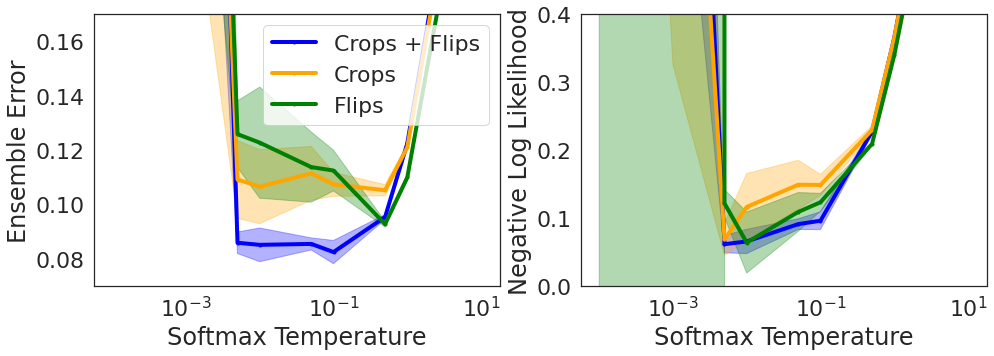

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(fullaug_acc["stemp"], 1 - fullaug_acc["mean"], marker = ".", color = "blue", label = "Crops + Flips")
ax[0].fill_between(fullaug_acc["stemp"], 1 - fullaug_acc["mean"] - 2 * fullaug_acc["std"] / (5**0.5), 
                   1 - fullaug_acc["mean"] + 2 * fullaug_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[0].plot(crops_acc["stemp"], 1 - crops_acc["mean"], marker = ".", color = "orange", label = "Crops")
ax[0].fill_between(crops_acc["stemp"], 1 - crops_acc["mean"] - 2 * crops_acc["std"] / (5**0.5), 
                   1 - crops_acc["mean"] + 2 * crops_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "orange")

ax[0].plot(flips_acc["stemp"], 1 - flips_acc["mean"], marker = ".", color = "green", label = "Flips")
ax[0].fill_between(flips_acc["stemp"], 1 - flips_acc["mean"] - 2 * flips_acc["std"] / (5**0.5), 
                   1 - flips_acc["mean"] + 2 * flips_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "green")

ax[1].plot(fullaug_nll["stemp"], -fullaug_nll["mean"], marker = ".", color = "blue")
ax[1].fill_between(fullaug_nll["stemp"], - fullaug_nll["mean"] - 2 * fullaug_nll["std"] / (5**0.5), 
               - fullaug_nll["mean"] + 2 * fullaug_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[1].plot(crops_nll["stemp"], - crops_nll["mean"], marker = ".", color = "orange")
ax[1].fill_between(crops_nll["stemp"], - crops_nll["mean"] - 2 * crops_nll["std"] / (5**0.5), 
                   - crops_nll["mean"] + 2 * crops_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "orange")

ax[1].plot(flips_nll["stemp"], - flips_nll["mean"], marker = ".", color = "green")
ax[1].fill_between(flips_nll["stemp"], - flips_nll["mean"] - 2 * flips_nll["std"] / (5**0.5), 
                   - flips_nll["mean"] + 2 * flips_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "green")

ax[1].semilogx()
ax[0].semilogx()
ax[0].set_ylim((0.07, 0.17))
ax[1].set_ylim((0.0, 0.4))

ax[0].set_xlabel("Softmax Temperature")
ax[1].set_xlabel("Softmax Temperature")

ax[0].set_ylabel("Ensemble Error")
ax[1].set_ylabel("Negative Log Likelihood")

ax[0].legend()
# plt.savefig("dataaug_counts.pdf", bbox_inches = "tight")
plt.show()

## Comparison against Cold Posteriors

(0.0, 0.4)

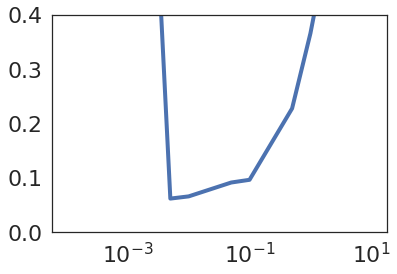

In [20]:
plt.plot(fullaug_nll.stemp, -fullaug_nll["mean"])
plt.semilogx()
plt.ylim((0, 0.4))

In [30]:
!ls ../results/from_greene/temp_scale_reproduce/

1   11	13  15	17  19	20  22	24  26	28  3	4  6  8
10  12	14  16	18  2	21  23	25  27	29  30	5  7  9


In [31]:
scale = []
result = []
for i in range(31):
    dir_name = "../results/from_greene/temp_scale_reproduce/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # print(res1["temperature"], res2["result"])
        if res2["result"] is not None:
            scale.append(res1["temperature"])
            result.append(res2["result"])
    except:
        print(i, "not found")

0 not found


In [33]:
repro = pd.DataFrame(result)
repro["stemp"] = scale
repro["lp_ens"] = repro["lp_ensemble"]

repro = repro.groupby("stemp")

repro_acc = repro["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

repro_nll = repro["lp_ens"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

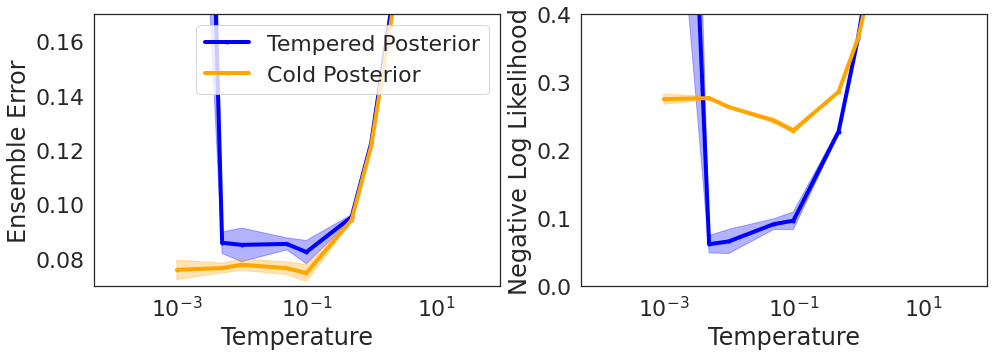

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(fullaug_acc["stemp"], 1 - fullaug_acc["mean"], marker = ".", color = "blue", label = "Tempered Posterior")
ax[0].fill_between(fullaug_acc["stemp"], 1 - fullaug_acc["mean"] - 2 * fullaug_acc["std"] / (5**0.5), 
                   1 - fullaug_acc["mean"] + 2 * fullaug_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[0].plot(repro_acc["stemp"], 1 - repro_acc["mean"], marker = ".", color = "orange", label = "Cold Posterior")
ax[0].fill_between(repro_acc["stemp"], 1 - repro_acc["mean"] - 2 * repro_acc["std"] / (3**0.5), 
                   1 - repro_acc["mean"] + 2 * repro_acc["std"] / (3**0.5), 
                   alpha = 0.3,
                  color = "orange")


ax[1].plot(fullaug_nll["stemp"], -fullaug_nll["mean"], marker = ".", color = "blue")
ax[1].fill_between(fullaug_nll["stemp"], - fullaug_nll["mean"] - 2 * fullaug_nll["std"] / (5**0.5), 
               - fullaug_nll["mean"] + 2 * fullaug_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

ax[1].plot(repro_nll["stemp"], -repro_nll["mean"], marker = ".", color = "orange")
ax[1].fill_between(repro_nll["stemp"], - repro_nll["mean"] - 2 * repro_nll["std"] / (5**0.5), 
               - repro_nll["mean"] + 2 * repro_nll["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "orange")

ax[1].semilogx()
ax[0].semilogx()
ax[0].set_ylim((0.07, 0.17))
ax[1].set_ylim((0.0, 0.4))

ax[0].set_xlabel("Temperature")
ax[1].set_xlabel("Temperature")

ax[0].set_ylabel("Ensemble Error")
ax[1].set_ylabel("Negative Log Likelihood")

ax[0].legend()
plt.savefig("posterior_type_comparison.pdf", bbox_inches = "tight")

## Smoothed Loss

In [42]:
scale3 = []
result3 = []
for i in range(52):
    dir_name = "../results/from_greene/exp_temp_prior_onetenth/" + str(i) + "/"
    # print(dir_name + "config.json")
    try:
        with open(dir_name + "config.json") as f:
            res1 = json.load(f)
        with open(dir_name + "run.json") as f:
            res2 = json.load(f)
        # if res1['data'] == 'cifar10_augmented':
        # print(res1)
        # print(res1["softmax_temp"], res2["result"])
        if res2["result"] is not None:
            scale3.append(res1["softmax_temp"])
            result3.append(res2["result"])
        else:
            print(i, "not completed?")
    except:
        print(i, "not found")

0 not found
1 not completed?
3 not completed?
51 not completed?


In [46]:
smoothed_loss = pd.DataFrame(result3)

smoothed_loss["stemp"] = scale3
smoothed_loss = smoothed_loss.groupby("stemp")
smoothed_loss_mean = smoothed_loss["acc_ensemble"].apply(
    lambda x: pd.DataFrame({"mean": x.mean(), "std": x.std()}, index=[0])
).reset_index()

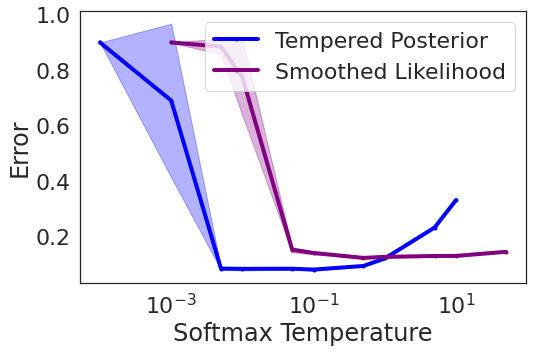

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.plot(fullaug_acc["stemp"], 1 - fullaug_acc["mean"], marker = ".", color = "blue", label = "Tempered Posterior")
ax.fill_between(fullaug_acc["stemp"], 1 - fullaug_acc["mean"] - 2 * fullaug_acc["std"] / (5**0.5), 
                   1 - fullaug_acc["mean"] + 2 * fullaug_acc["std"] / (5**0.5), 
                   alpha = 0.3,
                  color = "blue")

plt.plot(smoothed_loss_mean["stemp"], 1. - smoothed_loss_mean["mean"], marker = ".", color = "purple",
        label = "Smoothed Likelihood")
plt.fill_between(
    smoothed_loss_mean["stemp"], 
    1. - smoothed_loss_mean["mean"] - 2. * smoothed_loss_mean["std"] / (5**0.5),
    1. - smoothed_loss_mean["mean"] + 2. * smoothed_loss_mean["std"] / (5**0.5),
    alpha = 0.3, color = "purple"
)
plt.legend(loc = "upper right")
plt.semilogx()
plt.xlabel("Softmax Temperature")
plt.ylabel("Error")
plt.savefig("smoothed_likelihood.pdf", bbox_inches = "tight")